In [29]:
import pandas as pd
import numpy as np
import copy
import sys
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
curr_dir = os.getcwd()

dataset = pd.read_csv("\\Users\\ASUS\\Documents\\IST\\5ºAno\\CT15Mn-150818_101018\\dados_camara.csv")#dados mais recentes
tomtom = pd.read_csv("\\Users\\ASUS\\Documents\\IST\\5ºAno\\tomtom_data.csv")
#dataset = pd.read_csv("\\Users\\ASUS\\Documents\\IST\\5ºAno\\periodic_data.csv") #dados periodicos gerados automaticamente
dataset = pd.read_csv("\\Users\\ASUS\\Documents\\IST\\5ºAno\\dados_old.csv") #dados mais antigos
dataset['unique_id'] = dataset.Zona.astype(str) + '_' + dataset.ID_Espira.astype(str)
dataset['unique_id'] = dataset['unique_id'].str.lower()
dataset = dataset.loc[(dataset.unique_id == "4_ct4") & (dataset.Data == "2014-04-10")]
dataset = dataset.drop(columns=["Zona","Contadores","ID_Espira","unique_id"])
tomtom = tomtom.loc[(tomtom.date == "10-4-2019") & (tomtom.id_location == 3)]
dataset = dataset.values
tomtom.head()


,date,time,id_location,currentTravel_time,optimalTravel_time,current_speed,optimal_speed,lat1,long1,lat2,long2
2056,10-4-2019,0:00,3,97,97,22,22,38.734492,-9.143168,38.735247,-9.143405
2059,10-4-2019,0:15,3,97,97,22,22,38.734492,-9.143168,38.735247,-9.143405
2062,10-4-2019,0:30,3,97,97,22,22,38.734492,-9.143168,38.735247,-9.143405
2065,10-4-2019,0:45,3,97,97,22,22,38.734492,-9.143168,38.735247,-9.143405
2068,10-4-2019,1:00,3,97,97,22,22,38.734492,-9.143168,38.735247,-9.143405


In [22]:
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
hours = [dt.strftime('%H:%M') for dt in 
       datetime_range(datetime(2018, 8, 15, 0, 0), datetime(2018, 8, 15, 23, 59), 
       timedelta(minutes=15))]

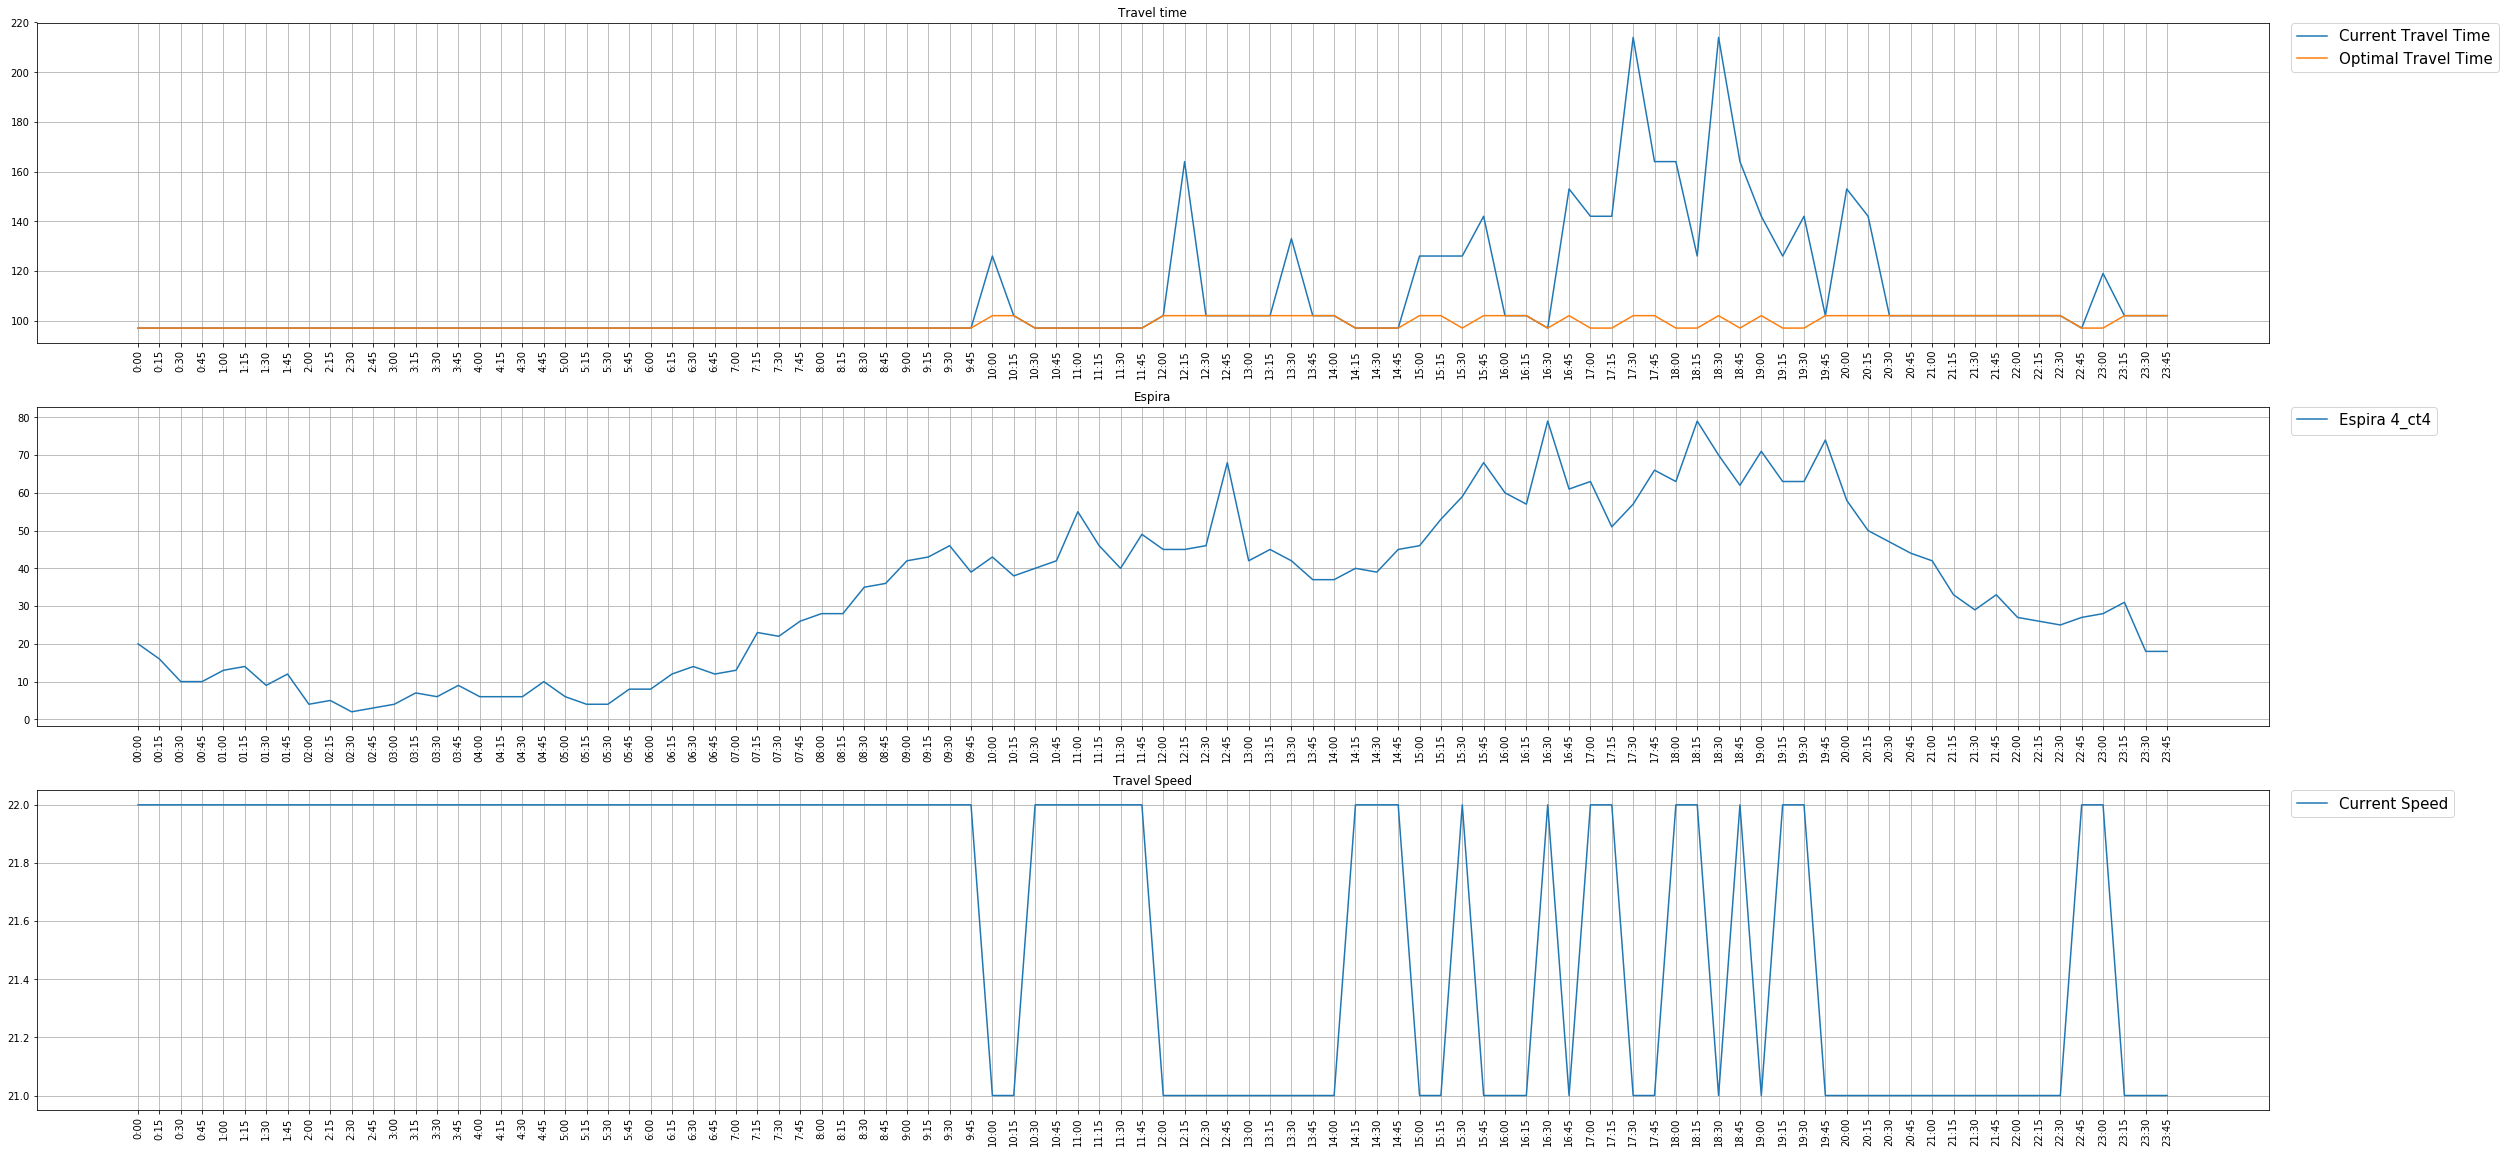

In [30]:
fig = plt.figure(1)
ax = fig.add_subplot(311)
ax.plot(tomtom["time"], tomtom["currentTravel_time"], label="Current Travel Time")
ax.plot(tomtom["time"], tomtom["optimalTravel_time"], label="Optimal Travel Time")
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,prop={'size': 15})#,title="ID Espira")
ax.grid(True)
ax.set_title("Travel time")
ax.tick_params(axis='x', rotation=90)

ax = fig.add_subplot(312)
ax.plot(hours,dataset[0][1:], label="Espira 4_ct4")
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,prop={'size': 15})#,title="ID Espira")
ax.grid(True)
ax.set_title("Espira")
ax.tick_params(axis='x', rotation=90)


ax = fig.add_subplot(313)
ax.plot(tomtom["time"], tomtom["current_speed"], label="Current Speed")
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,prop={'size': 15})#,title="ID Espira")
ax.grid(True)
ax.set_title("Travel Speed")
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(40, 20)
fig.savefig(curr_dir + "\\tomtom_plots\\" +"tomtom_10abril19.png", dpi=200)
